# Regressors Template

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

**Loading the dataset**

In [2]:
df = pd.read_csv('Regressors.csv')

In [3]:
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


## Setting up the data

**Train Test Split**

In [4]:
X = df.drop('X', axis=1).values
y = df["Y"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training models and Evaluating Model Performance

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear

In [7]:
regressors = [
    svm.SVR(kernel='linear'),
    svm.LinearSVR(),
    svm.NuSVR(kernel='linear'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.RidgeCV(),
    linear_model.ElasticNet(),
    linear_model.ElasticNetCV(),
    linear_model.Lasso(),
    linear_model.LassoCV(),
    linear_model.HuberRegressor(),
    linear_model.PoissonRegressor(),
    linear_model.TweedieRegressor(),
    linear_model.GammaRegressor()    
]
regression = pd.DataFrame(columns=['Regressor', 'R²'], index=None)
for item in regressors:
    print(item)
    reg = item
    reg.fit(X_train, y_train)
    print("Coef:", reg.coef_)
    predictions = reg.predict(X_test)
    regression = pd.concat([pd.DataFrame([[item, metrics.r2_score(y_test, predictions)]], columns=regression.columns, index=None), regression], ignore_index=True)
    print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R²: ', metrics.r2_score(y_test, predictions))
    print('\n')

SVR(kernel='linear')
Coef: [[57.50065141]]
MAE:  0.06100645448002902
RMSE:  0.06878777377729725
R²:  0.9999986132482239


LinearSVR()
Coef: [57.56837883]
MAE:  6.42582283679379e-13
RMSE:  7.334747197277987e-13
R²:  1.0


NuSVR(kernel='linear')
Coef: [[57.56837893]]
MAE:  3.9491698940648706e-07
RMSE:  4.075486347742516e-07
R²:  1.0


SGDRegressor()
Coef: [57.55612455]
MAE:  0.013932466150080206
RMSE:  0.017200856892128125
R²:  0.9999999132885622


BayesianRidge()
Coef: [57.56837883]
MAE:  5.505373934511226e-13
RMSE:  6.208785286568838e-13
R²:  1.0


ARDRegression()
Coef: [57.56837883]
MAE:  5.447346277757485e-13
RMSE:  6.138767405202209e-13
R²:  1.0


PassiveAggressiveRegressor()
Coef: [57.52664912]
MAE:  0.04022881713976726
RMSE:  0.04813804474007204
R²:  0.9999993208696887


TheilSenRegressor()
Coef: [57.56837883]
MAE:  4.86706971022007e-13
RMSE:  5.675087235392806e-13
R²:  1.0


LinearRegression()
Coef: [57.56837883]
MAE:  6.069219201284189e-16
RMSE:  1.7502599374402256e-15
R²:  1.0


### Non-Linear

In [8]:
regressors = [
    svm.SVR(kernel='rbf'),
    svm.SVR(kernel='poly'),
    svm.NuSVR(kernel='rbf'),
    svm.NuSVR(kernel='poly'),
    tree.DecisionTreeRegressor(max_depth=3),
    tree.ExtraTreeRegressor(),
    ensemble.RandomForestRegressor(n_estimators=300),
    ensemble.GradientBoostingRegressor(n_estimators=300),
    ensemble.ExtraTreesRegressor(n_estimators=300),
    ensemble.BaggingRegressor(n_estimators=300),
    ensemble.AdaBoostRegressor(n_estimators=300),
    neighbors.KNeighborsRegressor(),
    neighbors.RadiusNeighborsRegressor(),
]

for item in regressors:
    print(item)
    reg = item
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    regression = pd.concat([pd.DataFrame([[item, metrics.r2_score(y_test, predictions)]], columns=regression.columns, index=None), regression], ignore_index=True)
    print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R²: ', metrics.r2_score(y_test, predictions))
    print('\n')

SVR()
MAE:  9.820313311348038
RMSE:  17.47913284538911
R²:  0.9104602271406792


SVR(kernel='poly')
MAE:  23.13069263420566
RMSE:  25.161650994947706
R²:  0.814452763495485


NuSVR()
MAE:  11.145460033792883
RMSE:  18.684714115380046
R²:  0.8976826845582709


NuSVR(kernel='poly')
MAE:  23.07613080581341
RMSE:  25.228545227282726
R²:  0.813464868134915


DecisionTreeRegressor(max_depth=3)
MAE:  6.887453156667684
RMSE:  7.870692924832792
R²:  0.9818447530940412


ExtraTreeRegressor()
MAE:  0.7999999990500011
RMSE:  0.8606629659056346
R²:  0.999782908682811


RandomForestRegressor(n_estimators=300)
MAE:  0.3919259198634446
RMSE:  0.4514195236315537
R²:  0.9999402776486185


GradientBoostingRegressor(n_estimators=300)
MAE:  0.7043834986794878
RMSE:  0.7336431177143166
R²:  0.9998422585176568


ExtraTreesRegressor(n_estimators=300)
MAE:  0.049074071836075504
RMSE:  0.09859465580831467
R²:  0.9999971510621669


BaggingRegressor(n_estimators=300)
MAE:  0.38440740227269615
RMSE:  0.44109506251

### Poly

In [9]:
def plot_poly(X, y, degree = 1):
    
    var_array = []
    i_array = []
    plt.figure(figsize=(16, 6))
 
    for i in range(1, degree+1):
        poly_features = PolynomialFeatures(degree=i)
        X_poly = poly_features.fit_transform(X)
        lm = linear_model.LinearRegression()
        lm.fit(X_poly, y)
        y_pred = lm.predict(X_poly)
        variance = (np.power(y - y_pred, 2).sum()) / (len(X) - i - 1)
        var_array.append(variance)
        i_array.append(i)
        print(f"R2 {i} degree: {metrics.r2_score(y, y_pred)}")
        print(f"RMSE {i} degree: {np.sqrt(metrics.mean_squared_error(y, y_pred))}")
        print(f"Variance: {variance}")
        print("--------------------------------------")
        
        plt.subplot(1, 2, 1)
        plt.scatter(X, y)
        plt.plot(X, y_pred, label=f"degree {i}")
        plt.legend()
 
        plt.subplot(1, 2, 2)
        plt.scatter(i, variance, label=f"degree={i}", s=70)
        plt.plot(i_array, var_array, color="grey")
        plt.xlabel("degree, n", fontsize=18)
        plt.ylabel("variance", fontsize=18)
        plt.legend()

R2 1 degree: 1.0
RMSE 1 degree: 4.045950862609429e-14
Variance: 1.6479582264412735e-27
--------------------------------------
R2 2 degree: 1.0
RMSE 2 degree: 1.3552537799950399e-12
Variance: 1.8552654628190344e-24
--------------------------------------
R2 3 degree: 1.0
RMSE 3 degree: 2.642546824822718e-10
Variance: 7.077419312210097e-20
--------------------------------------


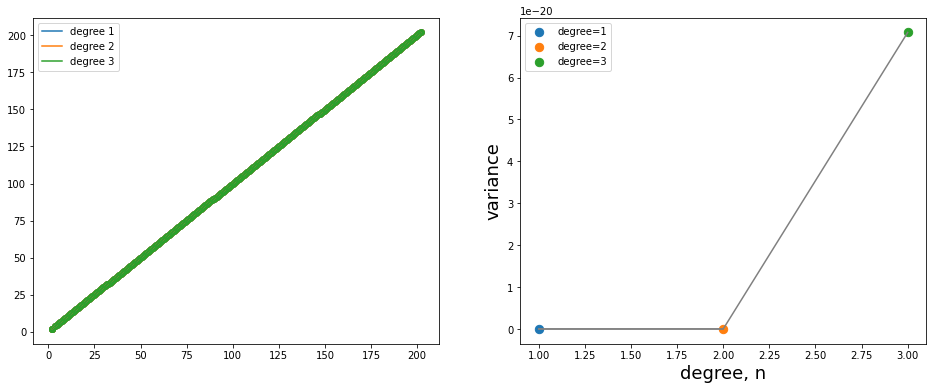

In [10]:
plot_poly(X, y, degree=3)
#We should consider the lower degree of polynomial regression, looking at the two first without significant variance

In [11]:
poly_feat = PolynomialFeatures(degree = 1) #Fill the degree value with the number of degrees obtained above
X_poly = poly_feat.fit_transform(X_train)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_poly, y_train)
predictions = poly_reg.predict(poly_feat.fit_transform(X_test))
regression = pd.concat([pd.DataFrame([['Poly_Reg', metrics.r2_score(y_test, predictions)]], columns=regression.columns, index=None), regression], ignore_index=True)

In [12]:
regression[regression['R²'] == regression['R²'].max()]

,Regressor,R²
0,Poly_Reg,1.0
17,HuberRegressor(),1.0
24,LinearRegression(),1.0
25,TheilSenRegressor(),1.0
27,ARDRegression(),1.0
28,BayesianRidge(),1.0
30,NuSVR(kernel='linear'),1.0
31,LinearSVR(),1.0


**Residuals**

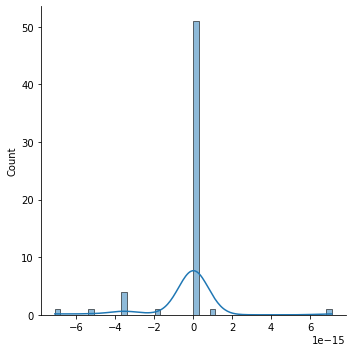

In [13]:
reg = linear_model.LinearRegression() #EDIT CHOOSING THE BEST REGRESSOR ABOVE
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

sns.displot((y_test - predictions), kde=True, bins=50)